In [ ]:
# Import required libraries
import pandas as pd
from google.colab import files
import io

# Upload file
uploaded = files.upload()

# Read the uploaded file assuming the filename is 'dataset.csv'
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

# Display first few rows to verify
df.head()


Saving dataset.csv to dataset.csv


,Material name,Pore Size (nm),SSA (m²/g),Voltage (V),Particle Size (nm),Conductivity (S/m),Redox Activity,Capacitance (F/g),Energy (Wh/kg) density,Power density (W/kg)
0,Mxenes,24,1384,1.86,87,343938.19,No,285,24,9843
1,Activated Carbon,6,2341,2.37,14,264202.01,No,213,33,2347
2,Carbon Nanotube (CNT),17,2188,2.48,59,835168.14,No,147,12,6781
3,Germanene,9,1325,1.68,22,750267.99,No,299,47,7590
4,rGO,28,2286,2.61,76,699940.26,No,188,18,8812


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import pandas as pd

# Normalize column names: strip + reduce multiple spaces/tabs to one space
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# Create 'Material' column based on 'Redox Activity'
df['Material'] = df['Redox Activity'].apply(lambda x: 'TMO' if str(x).lower() == 'high' else 'Carbon')

# Define features and target columns using cleaned names
feature_cols = ['Pore Size (nm)', 'SSA (m²/g)', 'Voltage (V)', 'Particle Size (nm)', 'Conductivity (S/m)']
target_cols = ['Capacitance (F/g)', 'Energy (Wh/kg) density', 'Power density (W/kg)']

# Split dataset into TMO and Carbon subsets
df_tmo = df[df['Material'] == 'TMO'].reset_index(drop=True)
df_carbon = df[df['Material'] == 'Carbon'].reset_index(drop=True)

# Features and targets for TMO
X_tmo = df_tmo[feature_cols]
y_tmo = df_tmo[target_cols]

# Features and targets for Carbon
X_carbon = df_carbon[feature_cols]
y_carbon = df_carbon[target_cols]

# Train-test split
X_tmo_train, X_tmo_test, y_tmo_train, y_tmo_test = train_test_split(
    X_tmo, y_tmo, test_size=0.2, random_state=42
)

X_carbon_train, X_carbon_test, y_carbon_train, y_carbon_test = train_test_split(
    X_carbon, y_carbon, test_size=0.2, random_state=42
)

# Train models
tmo_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
tmo_model.fit(X_tmo_train, y_tmo_train)

carbon_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
carbon_model.fit(X_carbon_train, y_carbon_train)

print("Multi-output Random Forest models trained successfully for TMO and Carbon.")




Multi-output Random Forest models trained successfully for TMO and Carbon.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_multioutput_model(model, X_test, y_test, target_names):
    # Predict on test data
    y_pred = model.predict(X_test)

    # y_pred is numpy array, convert y_test to numpy if it's a dataframe
    if hasattr(y_test, "values"):
        y_test_np = y_test.values
    else:
        y_test_np = y_test

    # For each target, compute metrics
    for i, target in enumerate(target_names):
        r2 = r2_score(y_test_np[:, i], y_pred[:, i])
        mse = mean_squared_error(y_test_np[:, i], y_pred[:, i])
        mae = mean_absolute_error(y_test_np[:, i], y_pred[:, i])

        print(f"Evaluation metrics for target: {target}")
        print(f"  R² Score       : {r2:.4f}")
        print(f"  Mean Squared Error : {mse:.4f}")
        print(f"  Mean Absolute Error: {mae:.4f}")
        print("-" * 40)

# Evaluate TMO model
print("TMO Model Evaluation:")
evaluate_multioutput_model(tmo_model, X_tmo_test, y_tmo_test, target_cols)

# Evaluate Carbon model
print("\nCarbon Model Evaluation:")
evaluate_multioutput_model(carbon_model, X_carbon_test, y_carbon_test, target_cols)


TMO Model Evaluation:
Evaluation metrics for target: Capacitance (F/g)
  R² Score       : -0.4824
  Mean Squared Error : 153089.4881
  Mean Absolute Error: 311.4360
----------------------------------------
Evaluation metrics for target: Energy (Wh/kg) density
  R² Score       : -0.4909
  Mean Squared Error : 52.9105
  Mean Absolute Error: 6.4360
----------------------------------------
Evaluation metrics for target: Power density (W/kg)
  R² Score       : -0.1064
  Mean Squared Error : 2365069.7402
  Mean Absolute Error: 1317.4880
----------------------------------------

Carbon Model Evaluation:
Evaluation metrics for target: Capacitance (F/g)
  R² Score       : 0.4230
  Mean Squared Error : 2192.7539
  Mean Absolute Error: 44.6567
----------------------------------------
Evaluation metrics for target: Energy (Wh/kg) density
  R² Score       : -40.7585
  Mean Squared Error : 176.3135
  Mean Absolute Error: 13.2633
----------------------------------------
Evaluation metrics for target:

<ipython-input-6-a9c4e7fdaabe>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Material', y='Capacitance (F/g)', data=df, ax=axes[0], palette='pastel')
<ipython-input-6-a9c4e7fdaabe>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Material', y='Energy (Wh/kg) density', data=df, ax=axes[1], palette='pastel')
<ipython-input-6-a9c4e7fdaabe>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Material', y='Power density (W/kg)', data=df, ax=axes[2], palette='pastel')


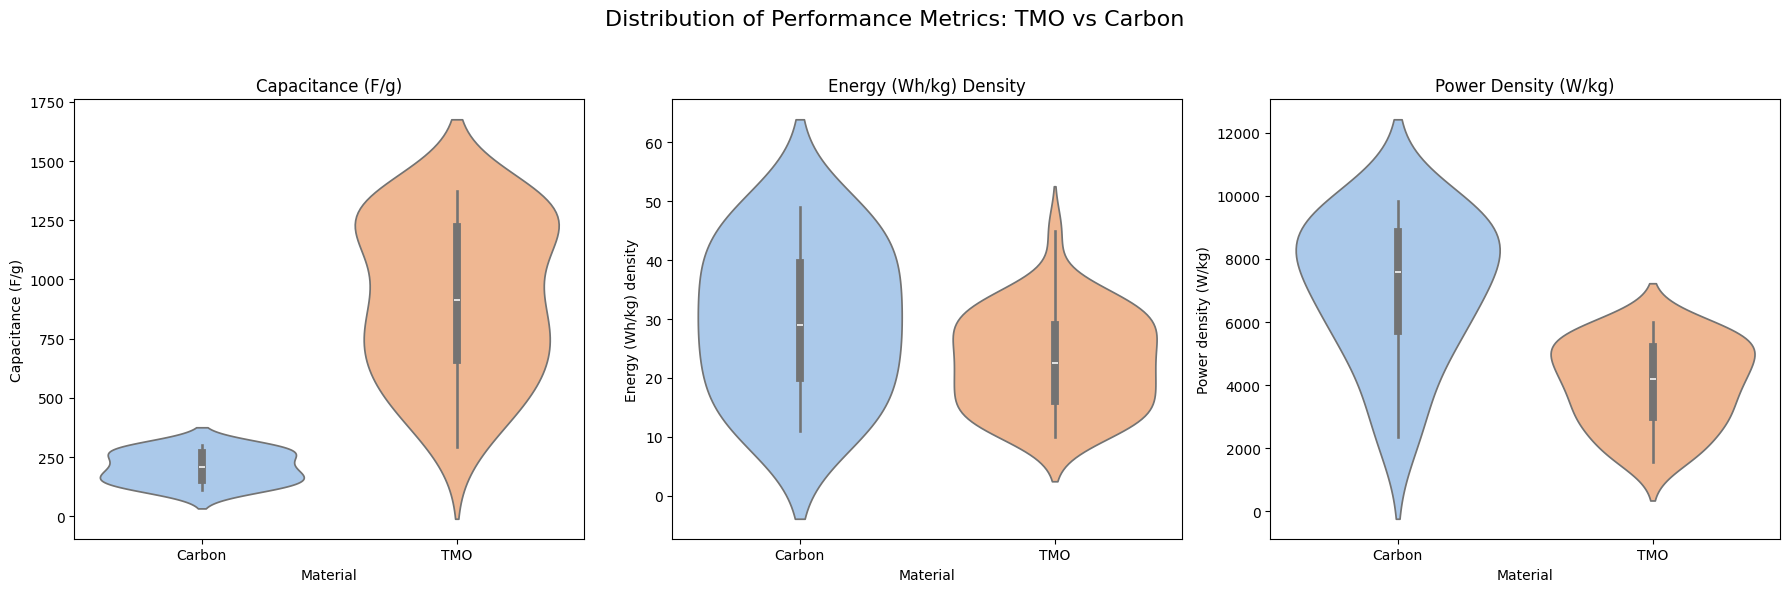

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip whitespace from column names again just in case
df.columns = df.columns.str.strip()

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Set the overall title
fig.suptitle('Distribution of Performance Metrics: TMO vs Carbon', fontsize=16)

# Violin plot for Capacitance
sns.violinplot(x='Material', y='Capacitance (F/g)', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Capacitance (F/g)')

# Violin plot for Energy Density
sns.violinplot(x='Material', y='Energy (Wh/kg) density', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Energy (Wh/kg) Density')

# Violin plot for Power Density
sns.violinplot(x='Material', y='Power density (W/kg)', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('Power Density (W/kg)')

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Numeric input features used for correlation: ['Pore Size (nm)', 'SSA (m²/g)', 'Voltage (V)', 'Particle Size (nm)', 'Conductivity (S/m)']


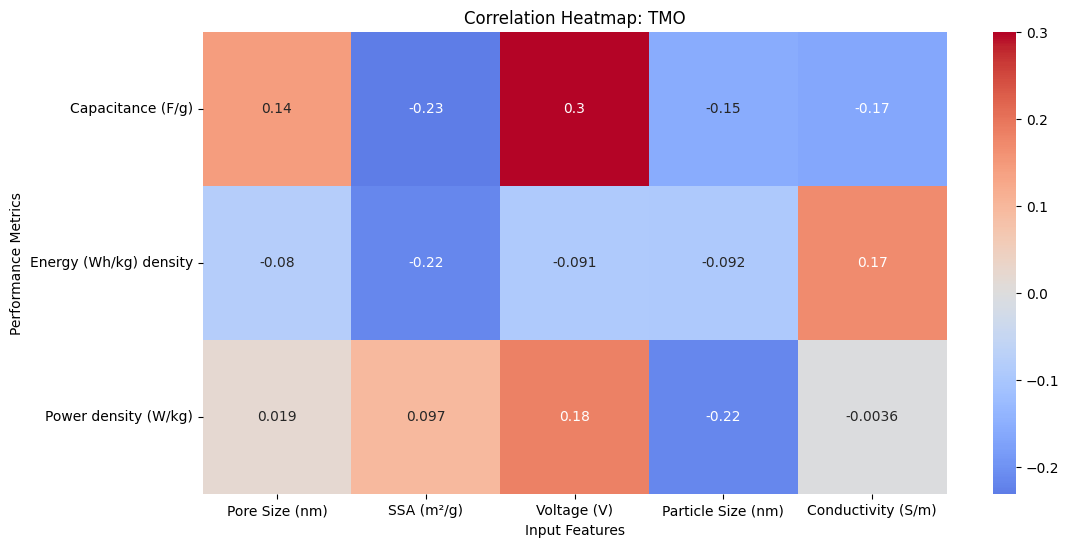

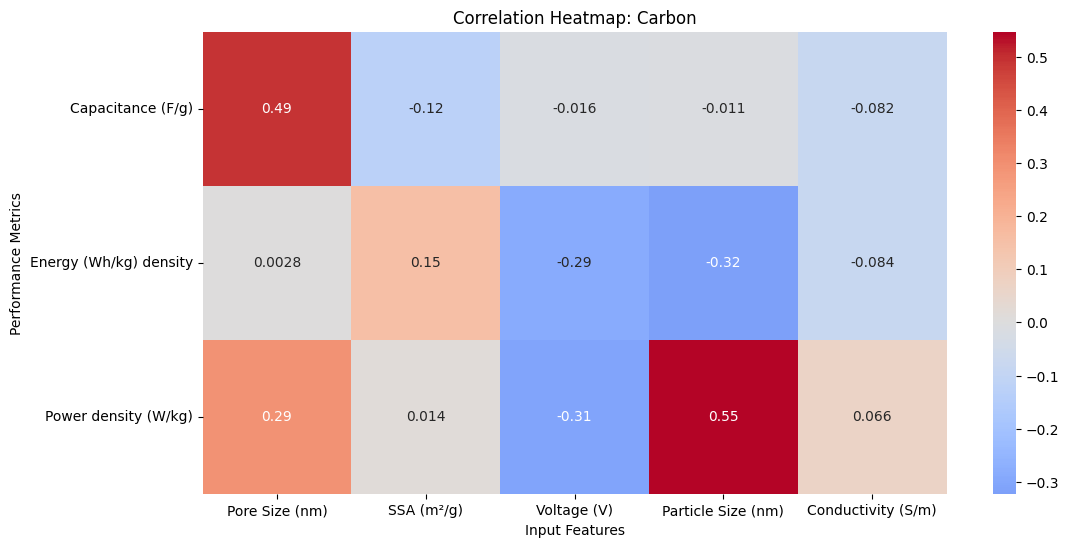

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

performance_metrics = ['Capacitance (F/g)', 'Energy (Wh/kg) density', 'Power density (W/kg)']
exclude_columns = performance_metrics + ['Redox Activity']

# Initially select input features (may contain non-numeric)
input_features = [col for col in df.columns if col not in exclude_columns]

# Filter input features to keep only numeric columns
numeric_input_features = df[input_features].select_dtypes(include='number').columns.tolist()

print("Numeric input features used for correlation:", numeric_input_features)

# Split dataframe into TMO and Carbon based on Redox Activity
df_tmo = df[df['Redox Activity'] == 'High']
df_carbon = df[df['Redox Activity'] == 'No']

# Select columns for correlation calculation
tmo_corr_data = df_tmo[performance_metrics + numeric_input_features]
carbon_corr_data = df_carbon[performance_metrics + numeric_input_features]

# Compute correlation matrices and select relevant part
corr_tmo = tmo_corr_data.corr().loc[performance_metrics, numeric_input_features]
corr_carbon = carbon_corr_data.corr().loc[performance_metrics, numeric_input_features]

# Plot heatmap for TMO
plt.figure(figsize=(12, 6))
sns.heatmap(corr_tmo, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: TMO')
plt.xlabel('Input Features')
plt.ylabel('Performance Metrics')
plt.show()

# Plot heatmap for Carbon
plt.figure(figsize=(12, 6))
sns.heatmap(corr_carbon, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Carbon')
plt.xlabel('Input Features')
plt.ylabel('Performance Metrics')
plt.show()
